<a href="https://colab.research.google.com/github/CibeleYamada/python_xpe_bootcamp/blob/main/C%C3%B3pia_de_Pte2_3_3_Ordena%C3%A7%C3%A3o_no_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ORDENAÇÃO NO PANDAS**

- Ordenar o dataframe de acordo com algum critério especificado: uso do método **sort_values**

Exemplo: ordenando o dataframe pela col1, por ordem alfabética.

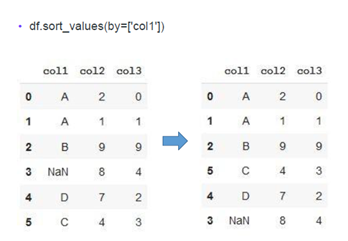

Ordenando em ordem decrescente:

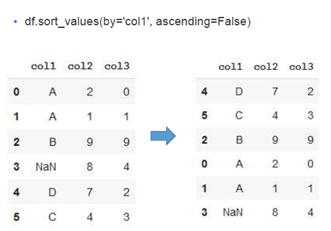

Ordenando por mais de uma coluna:

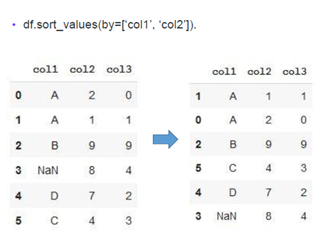

Ordenação colocando o NaN como primeiro (porque por padrão, eles são colocados por último)

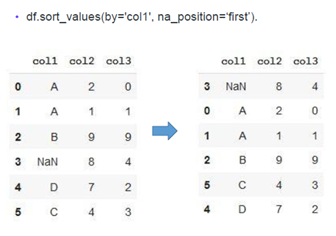

**PRÁTICA**

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('https://pycourse.s3.amazonaws.com/temperature.csv')
df

,date,temperatura,classification
0,2020-01-01,29.1,quente
1,2020-02-01,31.2,muito quente
2,2020-03-01,28.5,quente
3,2020-04-01,28.0,quente
4,2020-05-01,24.0,confortavel
5,2020-06-01,20.0,frio


- Método sort_values
- Método sort_index

**Método sort_values**

- padrão: ordem crescente
- seu principal argumento é o *by* + nome da coluna que vai ser o guia de ordenação.

In [ ]:
df.sort_values(by='temperatura')

,date,temperatura,classification
5,2020-06-01,20.0,frio
4,2020-05-01,24.0,confortavel
3,2020-04-01,28.0,quente
2,2020-03-01,28.5,quente
0,2020-01-01,29.1,quente
1,2020-02-01,31.2,muito quente


In [ ]:
# Ordenação com múltiplas colunas:

df.sort_values(by= ['classification', 'temperatura'])

,date,temperatura,classification
4,2020-05-01,24.0,confortavel
5,2020-06-01,20.0,frio
1,2020-02-01,31.2,muito quente
3,2020-04-01,28.0,quente
2,2020-03-01,28.5,quente
0,2020-01-01,29.1,quente


**Método sort_index**

In [ ]:
# Ordenação pelo index. 
# Primeiro, vamos determinar a coluna que será o index. Colocaremos o date como index.
# Da mesma forma que na aula anterior, vamos primeiro alterar o tipo de dado do date de object para datetime


df['date'] = pd.to_datetime(df['date'])

In [ ]:
# Agora vamos colocar o date como index:

df = df.set_index('date')

In [ ]:
# Ordenando pelo index:

df.sort_index()

,temperatura,classification
date,,
2020-01-01,29.1,quente
2020-02-01,31.2,muito quente
2020-03-01,28.5,quente
2020-04-01,28.0,quente
2020-05-01,24.0,confortavel
2020-06-01,20.0,frio


In [ ]:
# Ordenação decrescente pelo index:

df.sort_index(ascending=False)

,temperatura,classification
date,,
2020-06-01,20.0,frio
2020-05-01,24.0,confortavel
2020-04-01,28.0,quente
2020-03-01,28.5,quente
2020-02-01,31.2,muito quente
2020-01-01,29.1,quente


#**VISUALIZAÇÃO DE DADOS NO PANDAS**

- Plot de linhas;
- Plot de barras;
- Gráfico de setores (Plot de 'pizza')

**Plot de linhas**

- Quando usamos visualização de dados em plot, o index do dataframe é considerado o eixo x do plot.

<Axes: xlabel='date'>

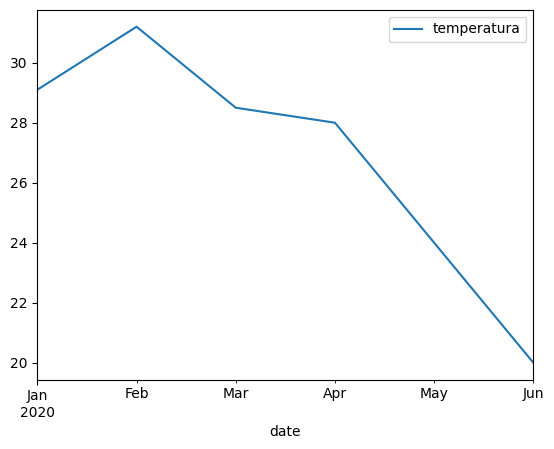

In [ ]:
# Plot de linhas:

df.plot()

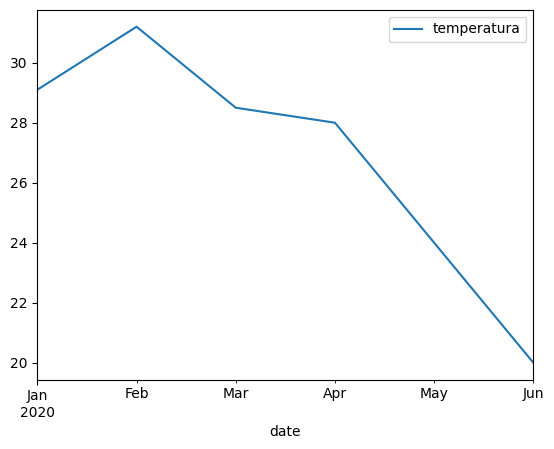

In [ ]:
# para que não apareça em cima do gráfico: <Axes: xlabel = 'date'>, basta colocar um ";" no fim do comando de plot:

df.plot();

Algumas customizações no plot de linhas:

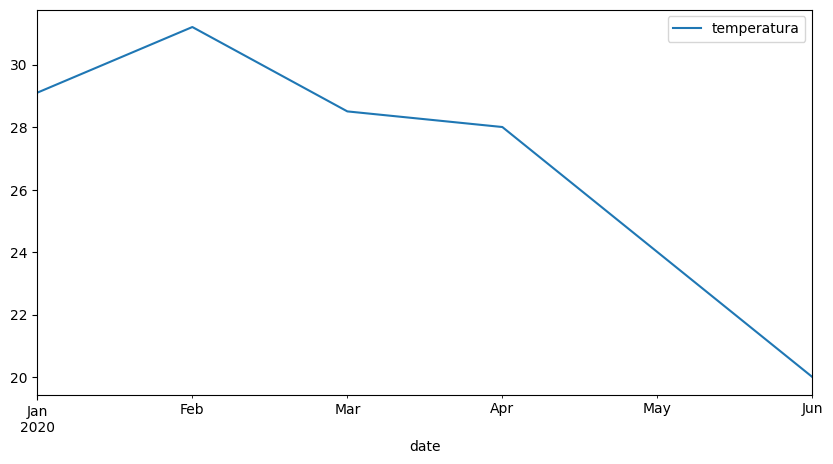

In [ ]:
# Tamanho: figsize - recebe como argumentos uma tupla, onde o 1º elemento corresponde à dimensão horizontal e o 2º, à dimensão vertical. 

df.plot(figsize =(10,5));

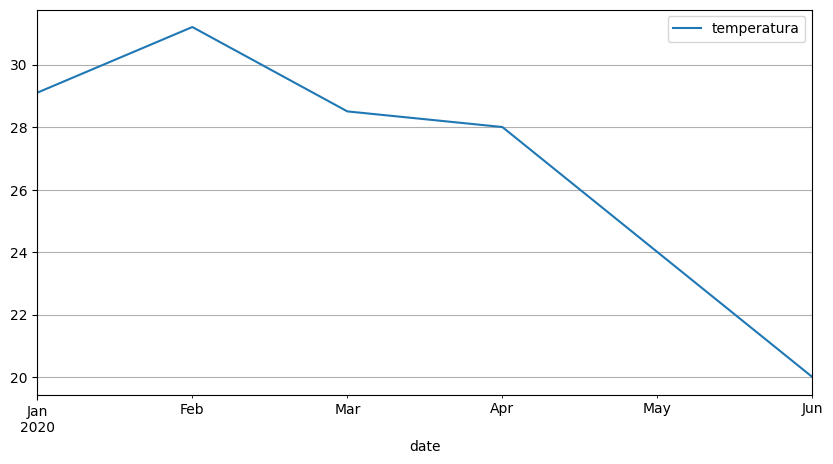

In [ ]:
# Grid: linhas de grade

df.plot(figsize =(10,5), grid=True);

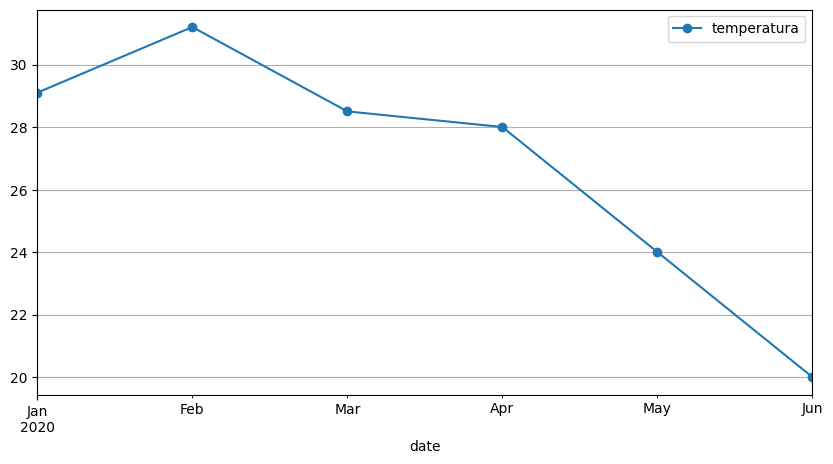

In [ ]:
# Estilo: coloca bolinhas nos pontos de intercalações;

df.plot(style='-o', figsize =(10,5), grid=True);

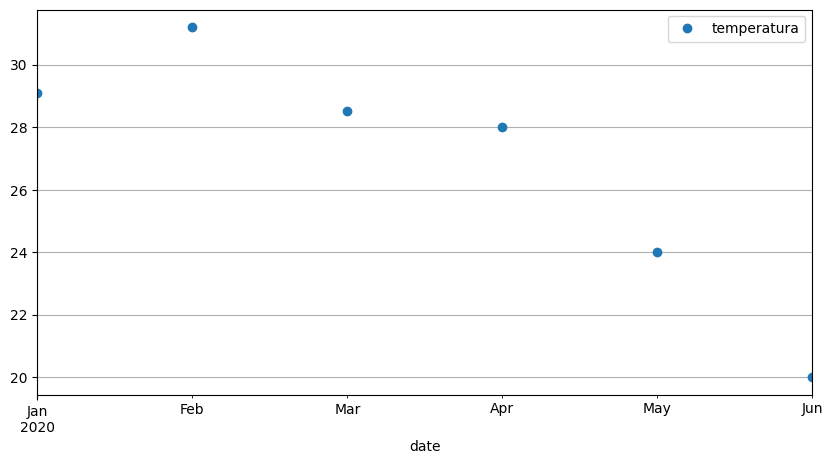

In [ ]:
# se colocássemos somente 'o' ao invés de '-o' no estilo, só ficariam as bolinhas

df.plot(style='o', figsize =(10,5), grid=True);

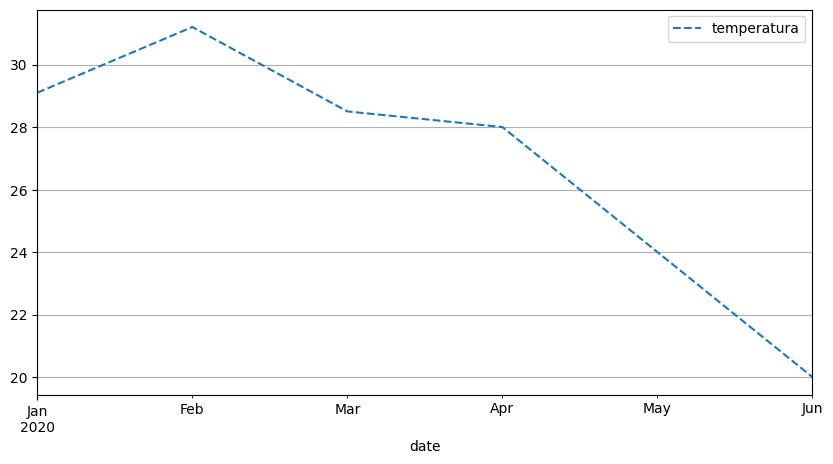

In [ ]:
# Outro estilo: linha tracejada (--)

df.plot(style='--', figsize =(10,5), grid=True);

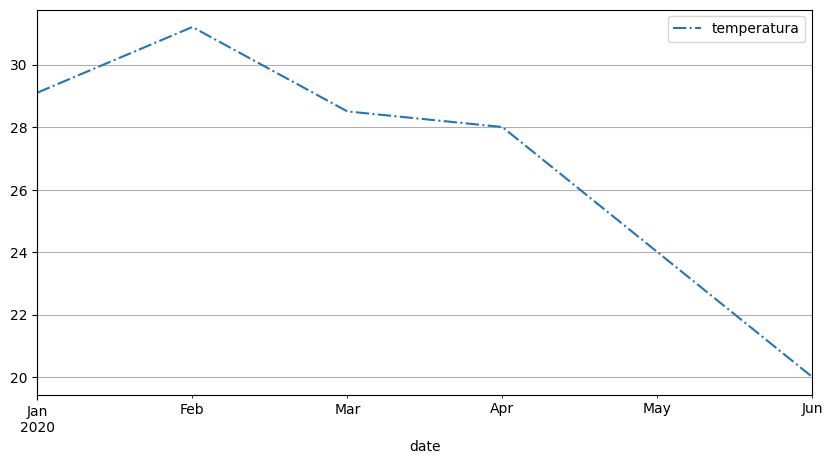

In [ ]:
# Outro estilo: linha-ponto (-.)

df.plot(style='-.', figsize =(10,5), grid=True);

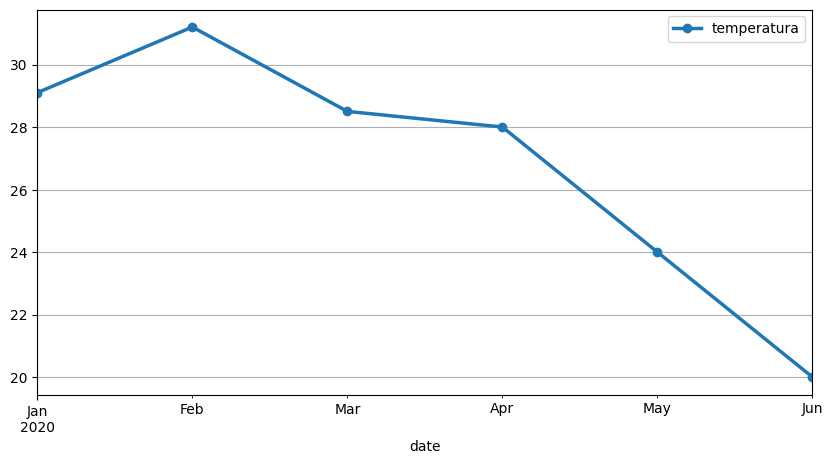

In [ ]:
# Espessura da linha: linewidth; como padrão é 1.

df.plot(style='-o', linewidth=2.5, figsize =(10,5), grid=True);

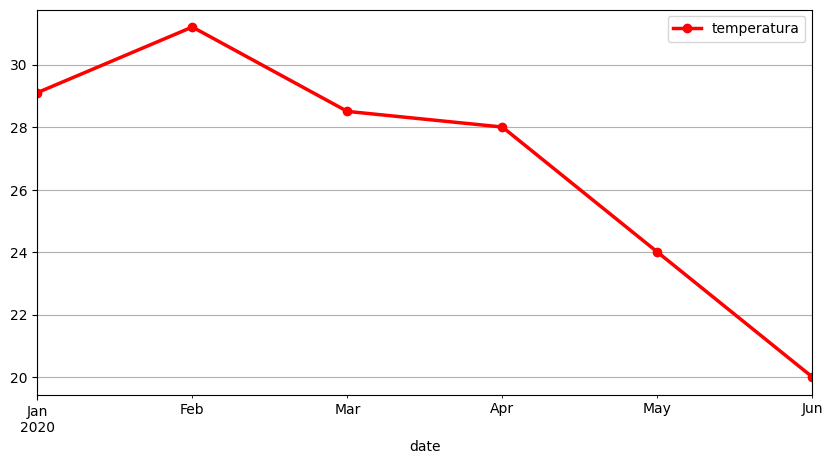

In [ ]:
# Cor: o default (padrão) segue uma sequência de cores

df.plot(style='-o', linewidth=2.5, color='red', figsize =(10,5), grid=True);

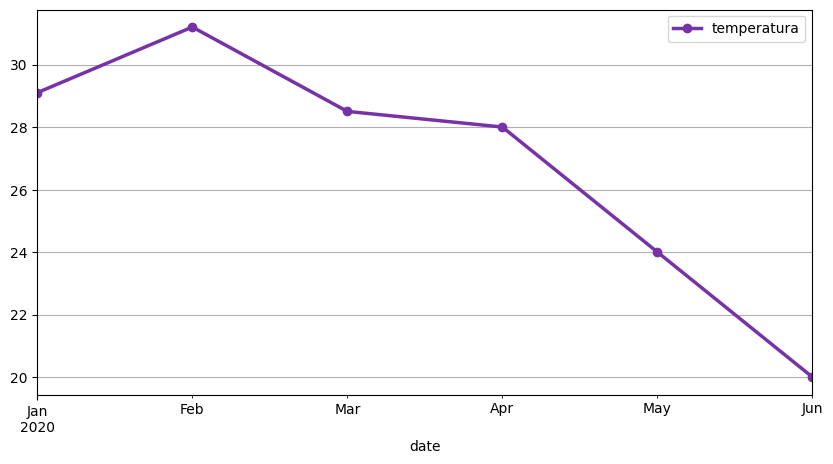

In [ ]:
# Nas cores, o pandas também aceita cores no formato hexadecimal

df.plot(style='-o', linewidth=2.5, color='#7732a8', figsize =(10,5), grid=True);

**Plot de barras**

- representa valores categóricos (não numéricos)
- como o padrão do plot é o de linhas, precisamos especificar que o tipo é barra nos argumentos (kind='bar') ou usar o método plot.bar().

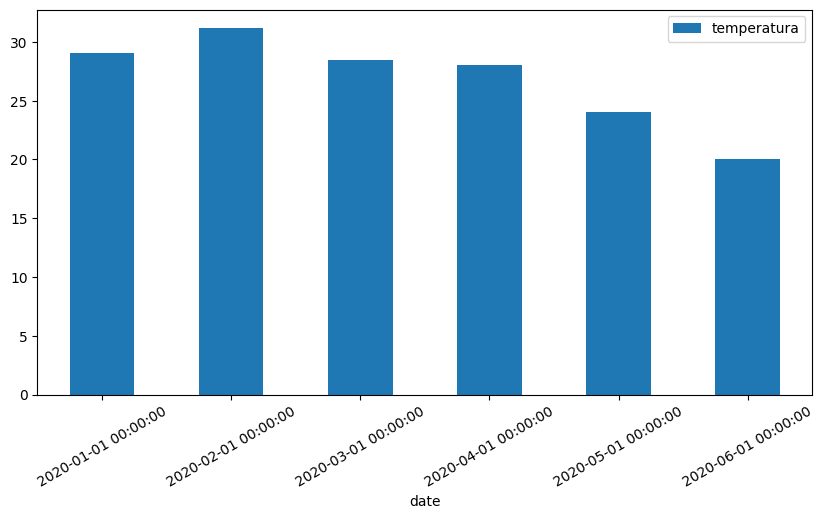

In [ ]:
# obs: o rot é a rotação do label do eixo x.

df.plot(kind='bar', figsize=(10, 5), rot=30);

In [ ]:
# ao invés de usar os dados numéricos, vamos usar os dados categóricos:

df['classification'].value_counts()

quente          3
muito quente    1
confortavel     1
frio            1
Name: classification, dtype: int64

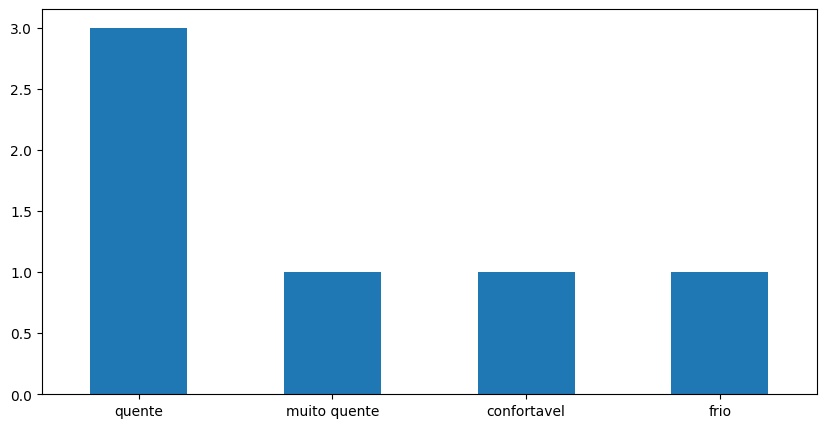

In [ ]:
df['classification'].value_counts().plot.bar(figsize=(10, 5), rot=0);

**Plot de Pizza**

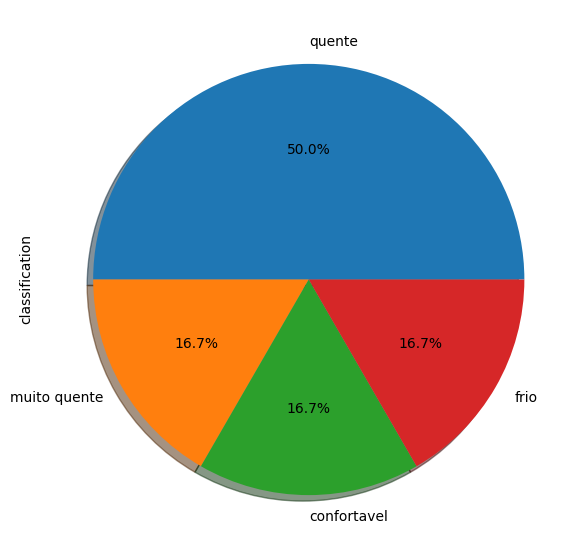

In [ ]:
df['classification'].value_counts().plot.pie(autopct='%1.1f%%',
                                             shadow=True,
                                             figsize=(10,7));

argumento shadow = sombreamento;
argumento autopct = coloca automaticamente as porcentagens. Nesse caso, queremos que coloque no formato 1,1f,, ou seja, uma casa decimal (uma casa depois da 'vírgula'), e o valor é um dado float (f).

#**OUTRAS DICAS SOBRE OS PANDAS**

- Método groupby (muito usado na análise de dados);
- Operações inplace;
- Compartilhamento de memória em cópias (quando estamos fazendo alguma cópia de um dataframe).

In [ ]:
df.head()

,temperatura,classification
date,,
2020-01-01,29.1,quente
2020-02-01,31.2,muito quente
2020-03-01,28.5,quente
2020-04-01,28.0,quente
2020-05-01,24.0,confortavel


**Método groupby**: usado para fazer agrupamentos dos dataframes de acordo com algum critério.

In [ ]:
# Agrupamento por valores únicos de uma ou mais colunas
# o retorno dele não significa muita coisa num primeiro momento. Somente depois que se aplica uma função no método.

df.groupby(by='classification')

In [ ]:
# Aplicando a função 'Média" no agrupamento:
# ou seja, agrupamos os dados de acordo com a coluna classification e calculamos a média de temperatura desses dados.

df.groupby(by='classification').mean()

,temperatura
classification,
confortavel,24.000000
frio,20.000000
muito quente,31.200000
quente,28.533333


In [ ]:
df.groupby(by='classification').sum()

,temperatura
classification,
confortavel,24.0
frio,20.0
muito quente,31.2
quente,85.6


**Método drop**: remove uma coluna

In [ ]:
df.drop('temperatura', axis=1)

,classification
date,
2020-01-01,quente
2020-02-01,muito quente
2020-03-01,quente
2020-04-01,quente
2020-05-01,confortavel
2020-06-01,frio


**Método copy**: copia um dataframe; evita compartilhamento de memória; sem o copy(), operações inplace no dataframe2 também alteram o dataframe original.

- Operações inplace = argumento aplicado para sobrescrever o dataframe.

In [ ]:
df2 = df.copy()
df2

,temperatura,classification
date,,
2020-01-01,29.1,quente
2020-02-01,31.2,muito quente
2020-03-01,28.5,quente
2020-04-01,28.0,quente
2020-05-01,24.0,confortavel
2020-06-01,20.0,frio


In [ ]:
df2.drop('temperatura', axis=1, inplace=True)

In [ ]:
df2.head()

,classification
date,
2020-01-01,quente
2020-02-01,muito quente
2020-03-01,quente
2020-04-01,quente
2020-05-01,confortavel


In [ ]:
df

,temperatura,classification
date,,
2020-01-01,29.1,quente
2020-02-01,31.2,muito quente
2020-03-01,28.5,quente
2020-04-01,28.0,quente
2020-05-01,24.0,confortavel
2020-06-01,20.0,frio
